<a href="https://www.kaggle.com/code/lalit7881/drug-resistance-multi-class-prediction?scriptVersionId=300371647" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/antibiotic-resistance-tracking-csv/antibiotic_resistance_tracking.csv


## Import dataset

In [2]:
df = pd.read_csv('/kaggle/input/antibiotic-resistance-tracking-csv/antibiotic_resistance_tracking.csv')
df.head()

,Patient_ID,Age,Gender,Specimen_Type,Amoxicillin,Ciprofloxacin,Meropenem,Vancomycin,Colistin,Test_Method,Resistance_Genes,Outcome
0,P0001,36,Female,Blood,Intermediate,Sensitive,Intermediate,Intermediate,Intermediate,Automated System,KPC,ICU
1,P0002,59,Female,Blood,Intermediate,Resistant,Intermediate,Sensitive,Intermediate,MIC,KPC,Recovered
2,P0003,13,Female,Urine,Intermediate,Sensitive,Resistant,Intermediate,Resistant,MIC,OXA-48,ICU
3,P0004,4,Female,Sputum,Intermediate,Resistant,Sensitive,Intermediate,Intermediate,Automated System,OXA-48,ICU
4,P0005,51,Male,Urine,Resistant,Sensitive,Resistant,Intermediate,Intermediate,Automated System,NaN,ICU


In [3]:
df.tail()

,Patient_ID,Age,Gender,Specimen_Type,Amoxicillin,Ciprofloxacin,Meropenem,Vancomycin,Colistin,Test_Method,Resistance_Genes,Outcome
2195,P0996,78,Male,Sputum,Sensitive,Sensitive,Intermediate,Sensitive,Resistant,Automated System,NDM-1,ICU
2196,P0997,85,Male,Blood,Resistant,Sensitive,Resistant,Resistant,Intermediate,Disc Diffusion,VIM,ICU
2197,P0998,32,Male,Blood,Sensitive,Resistant,Resistant,Intermediate,Sensitive,Disc Diffusion,NDM-1,Recovered
2198,P0999,2,Male,Sputum,Intermediate,Sensitive,Resistant,Sensitive,Resistant,MIC,OXA-48,Recovered
2199,P1000,19,Female,Stool,Sensitive,Sensitive,Resistant,Sensitive,Resistant,Automated System,OXA-48,ICU


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_ID        2199 non-null   object
 1   Age               2200 non-null   int64 
 2   Gender            2200 non-null   object
 3   Specimen_Type     2200 non-null   object
 4   Amoxicillin       2200 non-null   object
 5   Ciprofloxacin     2200 non-null   object
 6   Meropenem         2200 non-null   object
 7   Vancomycin        2200 non-null   object
 8   Colistin          2200 non-null   object
 9   Test_Method       2200 non-null   object
 10  Resistance_Genes  1763 non-null   object
 11  Outcome           2200 non-null   object
dtypes: int64(1), object(11)
memory usage: 206.4+ KB


In [5]:
df.describe()

,Age
count,2200.000000
mean,45.647273
std,26.273151
min,1.000000
25%,23.000000
50%,45.000000
75%,69.000000
max,90.000000


In [6]:
df.isnull().sum()

Patient_ID            1
Age                   0
Gender                0
Specimen_Type         0
Amoxicillin           0
Ciprofloxacin         0
Meropenem             0
Vancomycin            0
Colistin              0
Test_Method           0
Resistance_Genes    437
Outcome               0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes


Patient_ID          object
Age                  int64
Gender              object
Specimen_Type       object
Amoxicillin         object
Ciprofloxacin       object
Meropenem           object
Vancomycin          object
Colistin            object
Test_Method         object
Resistance_Genes    object
Outcome             object
dtype: object

In [9]:
df.shape

(2200, 12)

In [10]:
df.nunique()

Patient_ID          2023
Age                   90
Gender                 2
Specimen_Type          5
Amoxicillin            3
Ciprofloxacin          3
Meropenem              3
Vancomycin             3
Colistin               3
Test_Method            3
Resistance_Genes       4
Outcome                3
dtype: int64

In [11]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Specimen_Type', 'Amoxicillin',
       'Ciprofloxacin', 'Meropenem', 'Vancomycin', 'Colistin', 'Test_Method',
       'Resistance_Genes', 'Outcome'],
      dtype='object')

## EDA

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

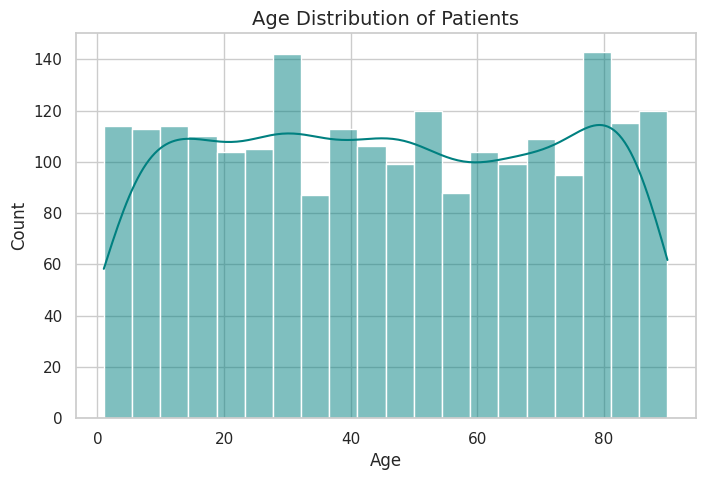

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='teal')
plt.title("Age Distribution of Patients", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

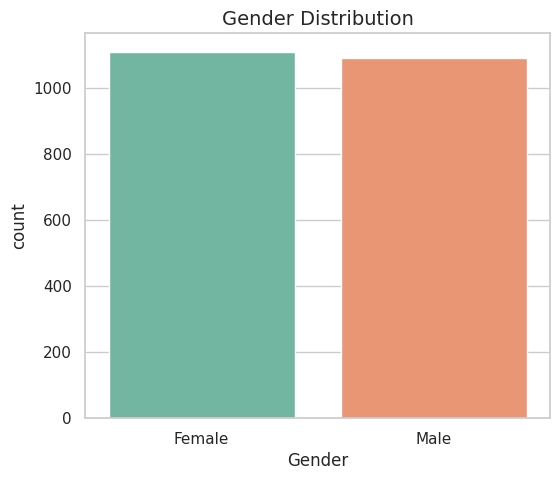

In [14]:
plt.figure(figsize=(6,5))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Distribution", fontsize=14)
plt.show()

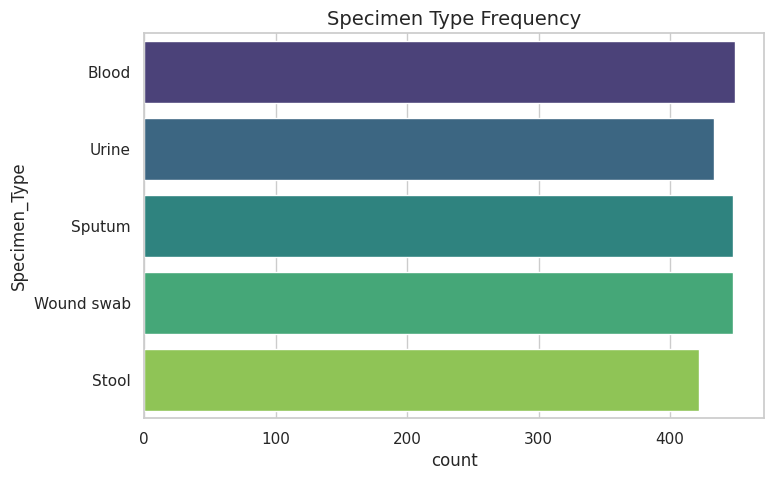

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(y='Specimen_Type', data=df, palette='viridis')
plt.title("Specimen Type Frequency", fontsize=14)
plt.show()

In [16]:
antibiotics = ['Amoxicillin', 'Ciprofloxacin', 'Meropenem', 
               'Vancomycin', 'Colistin']

# Clean text first
for col in antibiotics:
    df[col] = df[col].astype(str).str.strip().str.capitalize()

# Mapping
resistance_map = {
    'Sensitive': 0,
    'Intermediate': 1,
    'Resistant': 2
}

# Apply mapping
for col in antibiotics:
    df[col] = df[col].map(resistance_map)

# Convert to numeric (extra safety)
df[antibiotics] = df[antibiotics].apply(pd.to_numeric, errors='coerce')

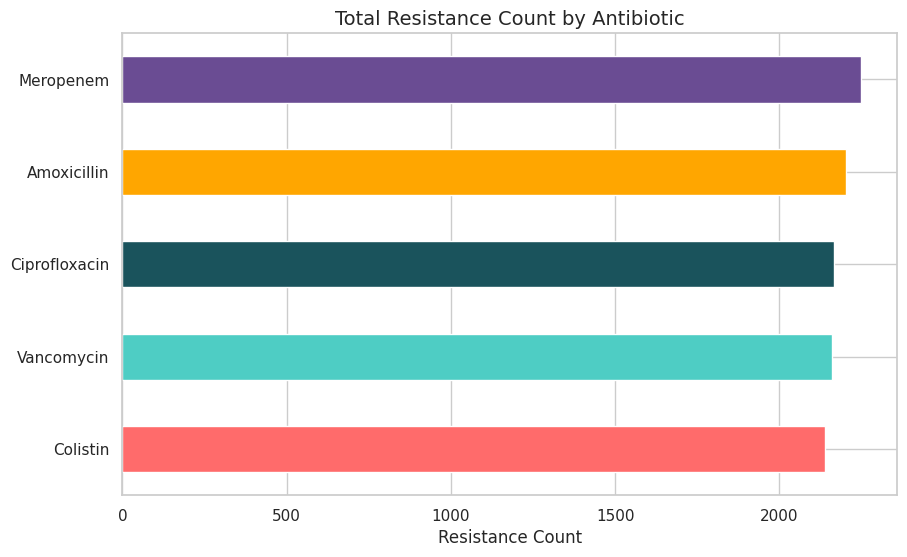

In [17]:
antibiotics = ['Amoxicillin', 'Ciprofloxacin', 'Meropenem', 
               'Vancomycin', 'Colistin']

plt.figure(figsize=(10,6))
df[antibiotics].sum().sort_values().plot(
    kind='barh',
    color=['#FF6B6B','#4ECDC4','#1A535C','#FFA600','#6A4C93']
)
plt.title("Total Resistance Count by Antibiotic", fontsize=14)
plt.xlabel("Resistance Count")
plt.show()

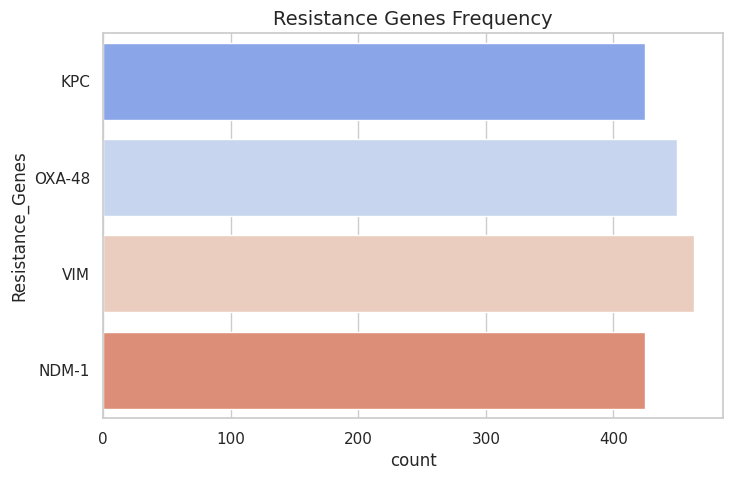

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(y='Resistance_Genes', data=df, palette='coolwarm')
plt.title("Resistance Genes Frequency", fontsize=14)
plt.show()

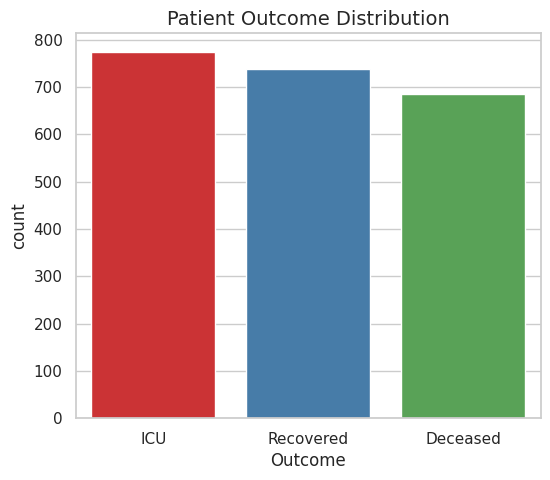

In [19]:
plt.figure(figsize=(6,5))
sns.countplot(x='Outcome', data=df, palette='Set1')
plt.title("Patient Outcome Distribution", fontsize=14)
plt.show()

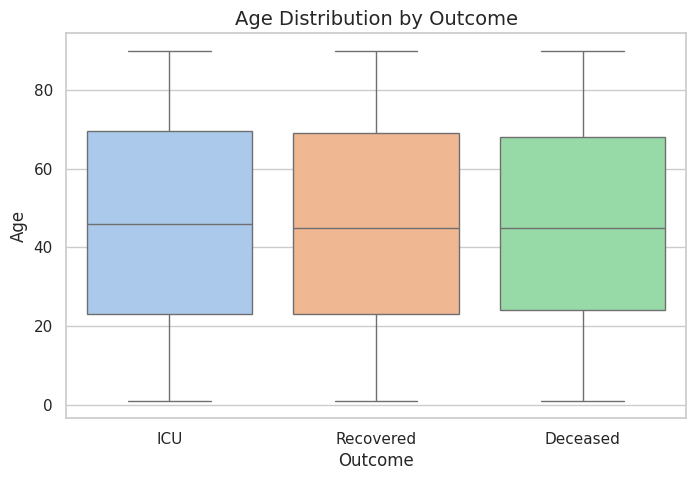

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Age', data=df, palette='pastel')
plt.title("Age Distribution by Outcome", fontsize=14)
plt.show()

In [21]:
antibiotics = ['Amoxicillin', 'Ciprofloxacin', 'Meropenem', 
               'Vancomycin', 'Colistin']

# Create mapping
resistance_map = {
    'Sensitive': 0,
    'Intermediate': 1,
    'Resistant': 2
}

# Apply mapping
for col in antibiotics:
    df[col] = df[col].map(resistance_map)

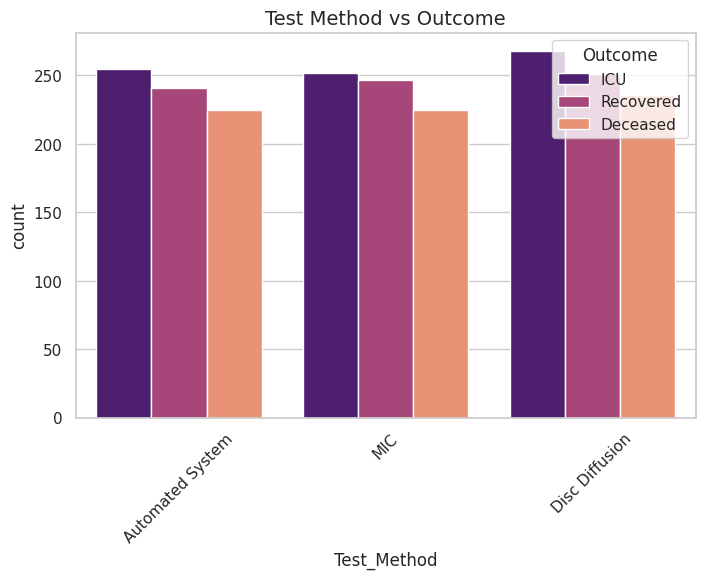

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='Test_Method', hue='Outcome', data=df, palette='magma')
plt.title("Test Method vs Outcome", fontsize=14)
plt.xticks(rotation=45)
plt.show()

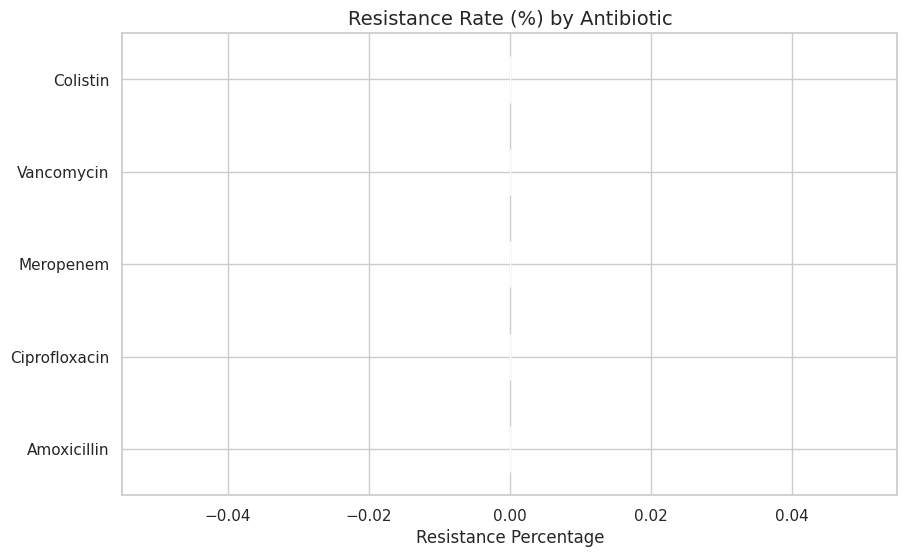

In [23]:
antibiotics = ['Amoxicillin', 'Ciprofloxacin', 'Meropenem', 
               'Vancomycin', 'Colistin']

resistance_rate = (df[antibiotics] == 2).mean() * 100

plt.figure(figsize=(10,6))
resistance_rate.sort_values().plot(
    kind='barh',
    color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
)

plt.title("Resistance Rate (%) by Antibiotic", fontsize=14)
plt.xlabel("Resistance Percentage")
plt.show()

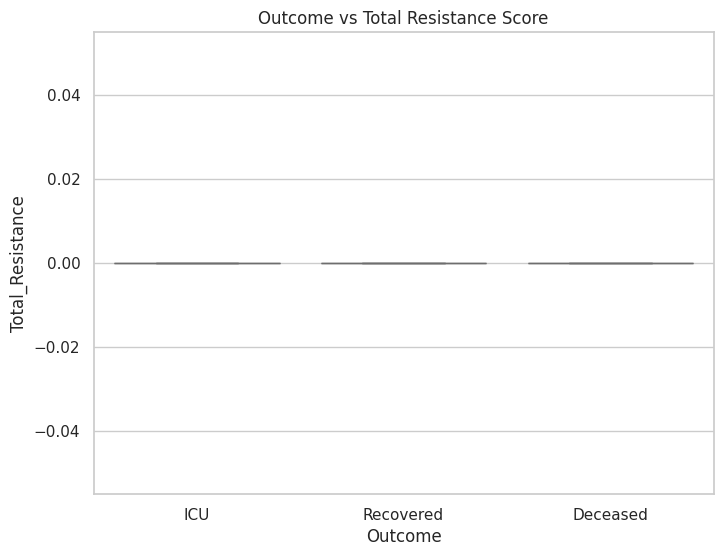

In [24]:
df['Total_Resistance'] = df[antibiotics].sum(axis=1)

plt.figure(figsize=(8,6))
sns.boxplot(x='Outcome', y='Total_Resistance', data=df, palette='coolwarm')
plt.title("Outcome vs Total Resistance Score")
plt.show()

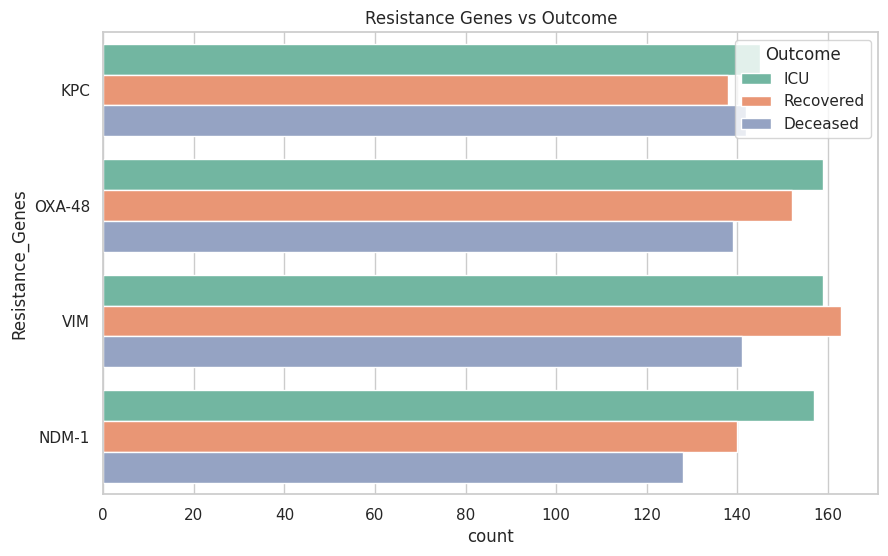

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(
    y='Resistance_Genes',
    hue='Outcome',
    data=df,
    palette='Set2'
)

plt.title("Resistance Genes vs Outcome")
plt.show()

Categorical Features: ['Gender', 'Specimen_Type', 'Test_Method', 'Resistance_Genes', 'Outcome']


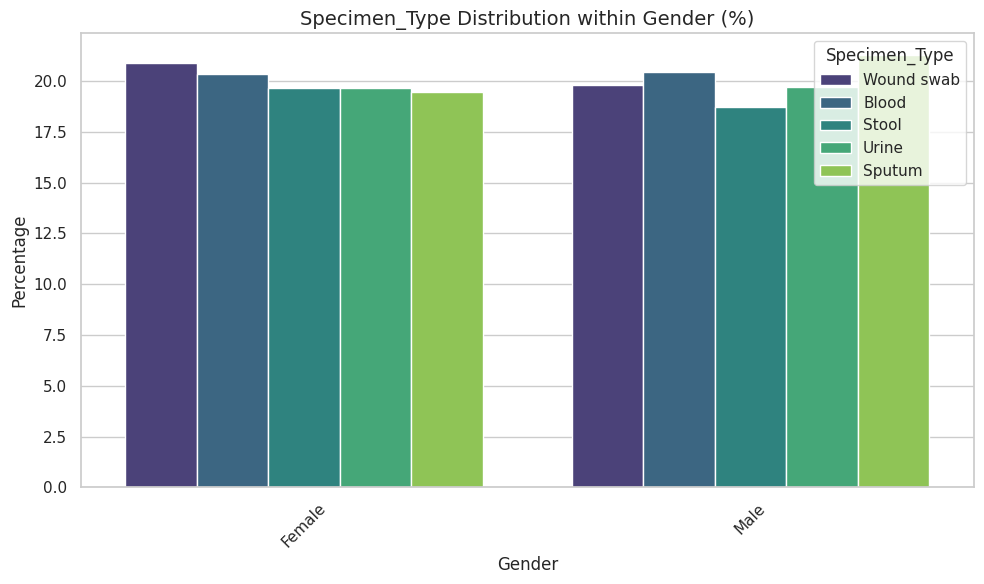

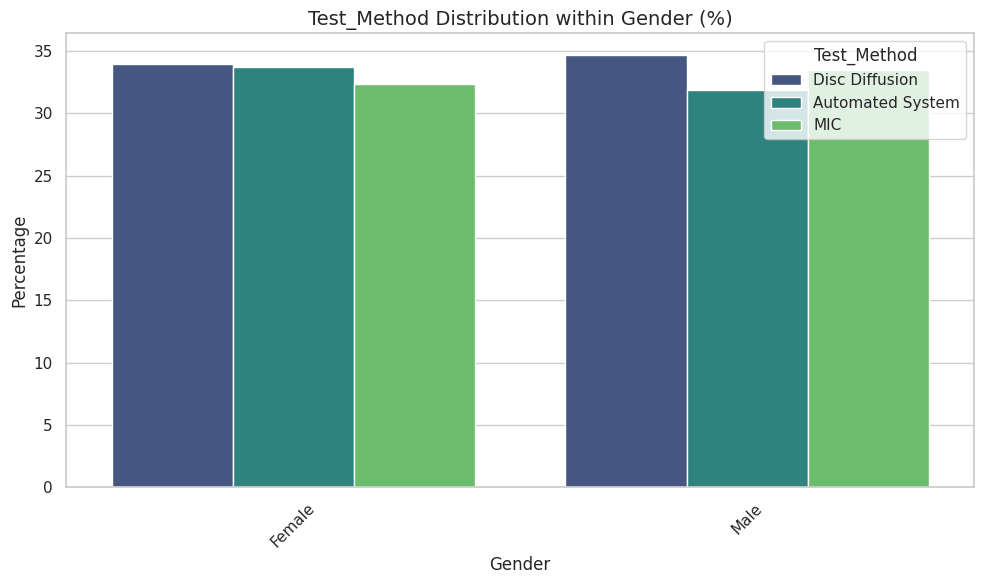

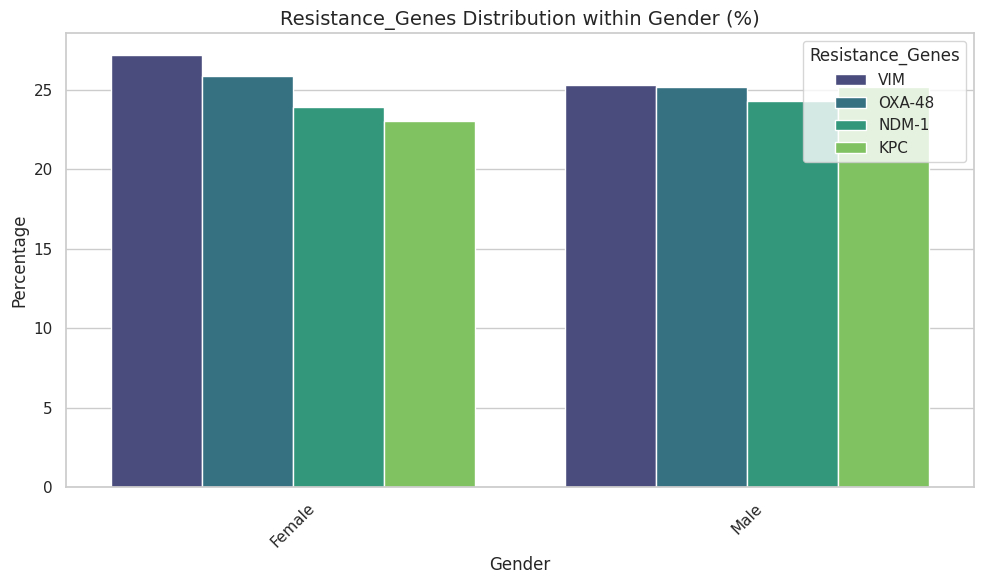

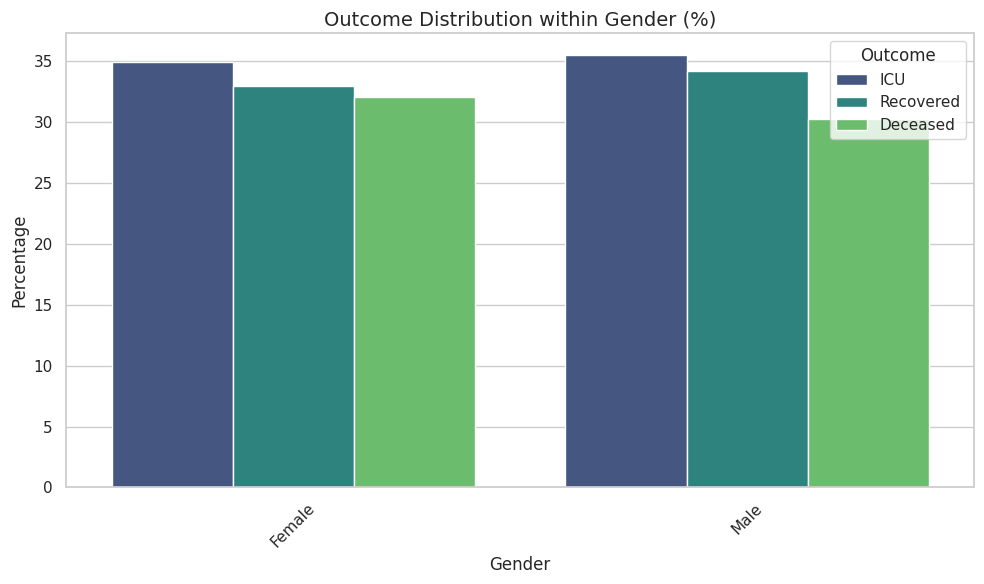

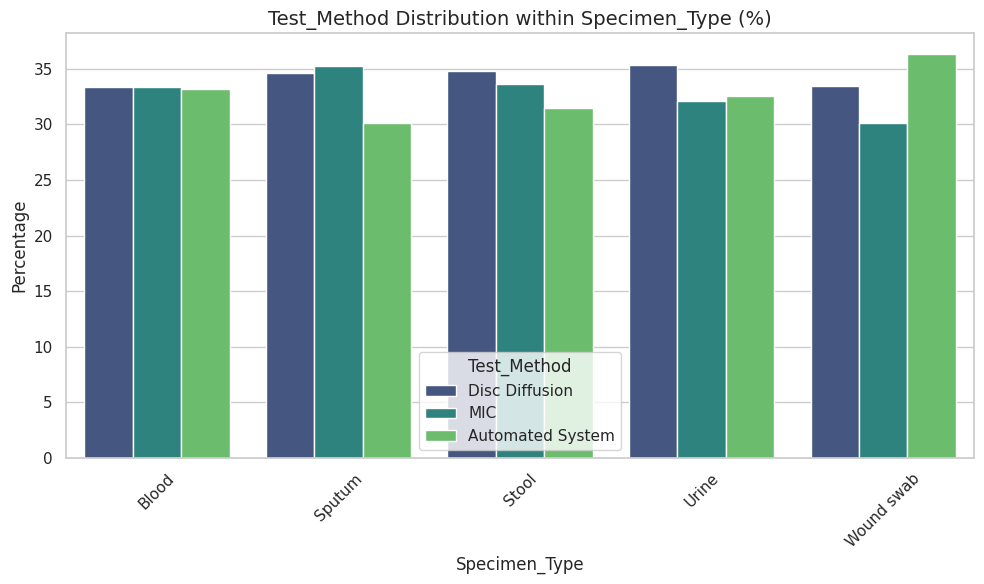

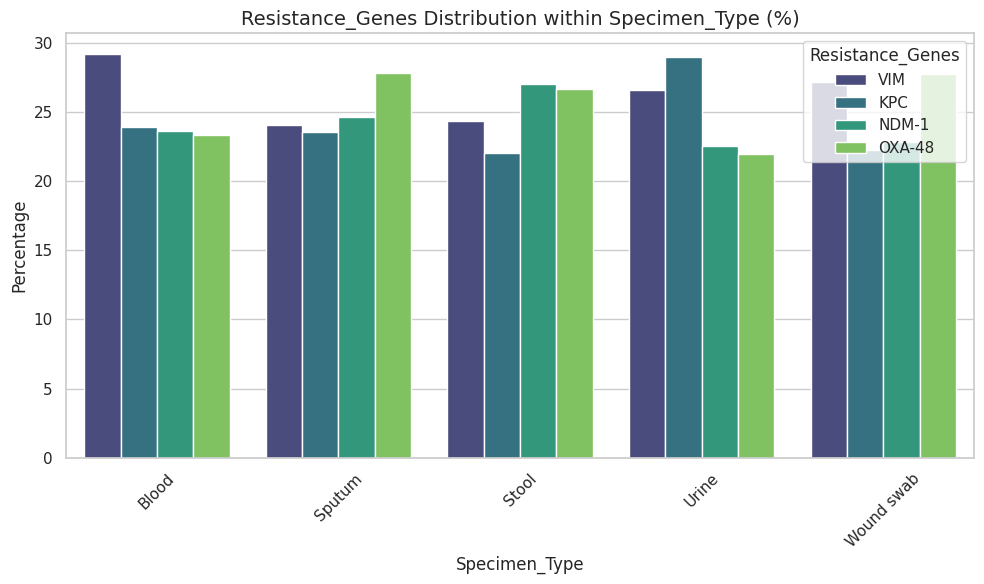

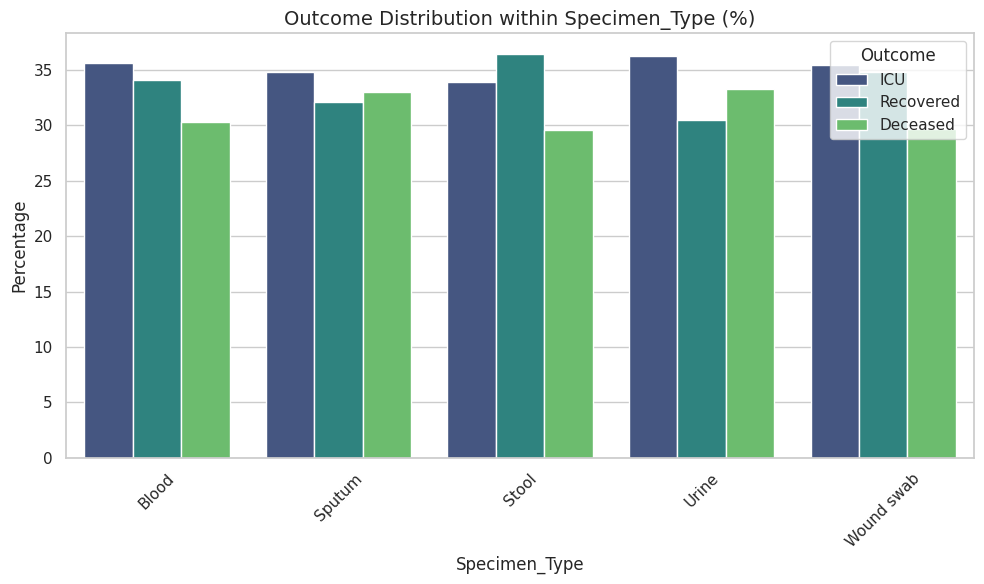

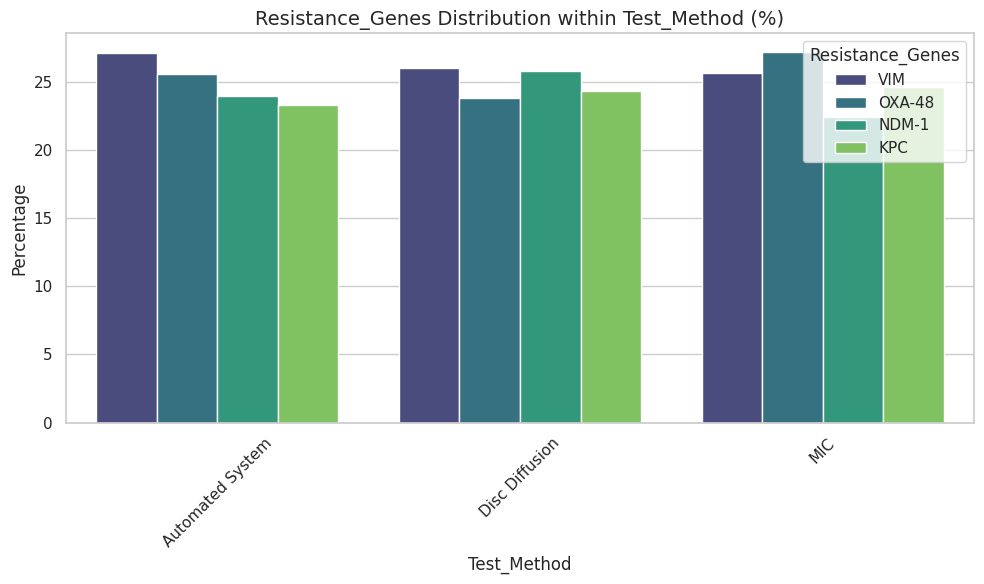

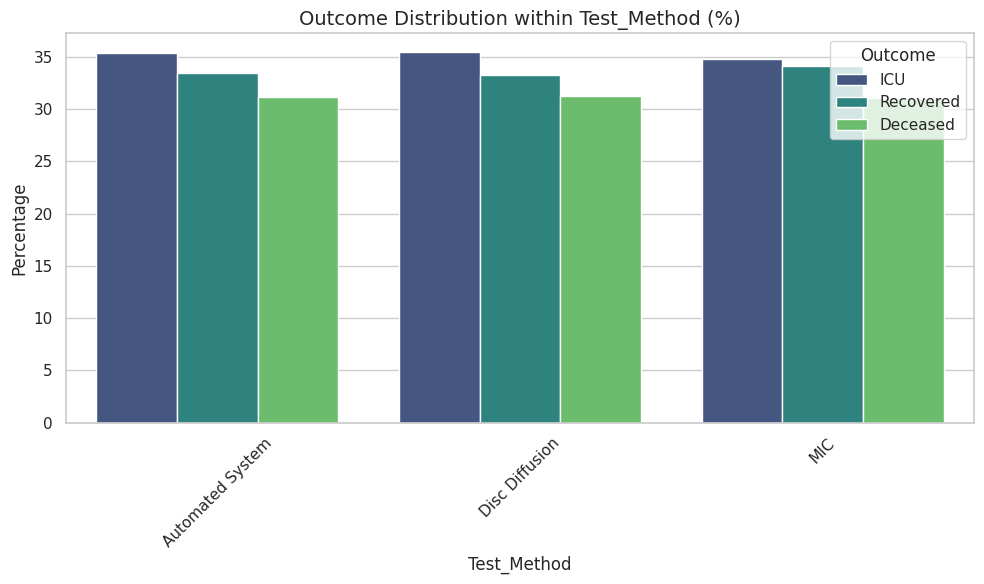

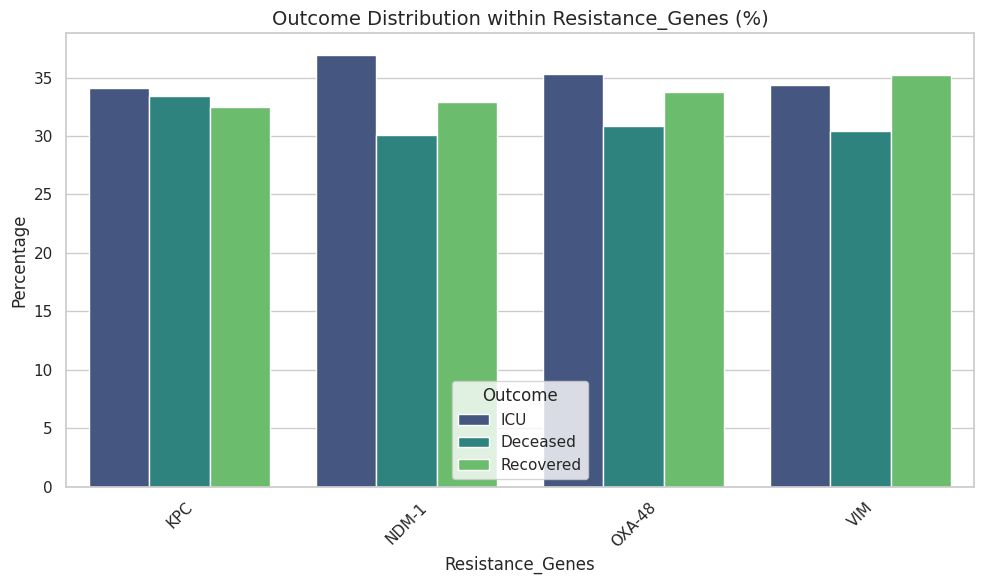

In [26]:
from itertools import combinations
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Patient_ID' in categorical_features:
    categorical_features.remove('Patient_ID')

print("Categorical Features:", categorical_features)
pairs = list(combinations(categorical_features, 2))

sns.set_style("whitegrid")

for feat_A, feat_B in pairs:
    
    dist = (
        df.groupby(feat_A)[feat_B]
        .value_counts(normalize=True)
        .rename("percentage")
        .mul(100)
        .reset_index()
    )
    
    plt.figure(figsize=(10,6))
    
    sns.barplot(
        data=dist,
        x=feat_A,
        y="percentage",
        hue=feat_B,
        palette="viridis"
    )
    
    plt.title(f"{feat_B} Distribution within {feat_A} (%)", fontsize=14)
    plt.ylabel("Percentage")
    plt.xlabel(feat_A)
    plt.xticks(rotation=45)
    plt.legend(title=feat_B)
    
    plt.tight_layout()
    plt.show()

In [27]:
df['Patient_ID'] = df['Patient_ID'].str.replace('P', '')

In [28]:
df.head(5)

,Patient_ID,Age,Gender,Specimen_Type,Amoxicillin,Ciprofloxacin,Meropenem,Vancomycin,Colistin,Test_Method,Resistance_Genes,Outcome,Total_Resistance
0,0001,36,Female,Blood,NaN,NaN,NaN,NaN,NaN,Automated System,KPC,ICU,0.0
1,0002,59,Female,Blood,NaN,NaN,NaN,NaN,NaN,MIC,KPC,Recovered,0.0
2,0003,13,Female,Urine,NaN,NaN,NaN,NaN,NaN,MIC,OXA-48,ICU,0.0
3,0004,4,Female,Sputum,NaN,NaN,NaN,NaN,NaN,Automated System,OXA-48,ICU,0.0
4,0005,51,Male,Urine,NaN,NaN,NaN,NaN,NaN,Automated System,NaN,ICU,0.0


## ML algo

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
target = 'Outcome'

X = df.drop(columns=[target])
y = df[target]

In [31]:
le = LabelEncoder()
y = le.fit_transform(y)

In [32]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Numeric: ['Age', 'Amoxicillin', 'Ciprofloxacin', 'Meropenem', 'Vancomycin', 'Colistin', 'Total_Resistance']
Categorical: ['Patient_ID', 'Gender', 'Specimen_Type', 'Test_Method', 'Resistance_Genes']


In [33]:
# Numeric pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [35]:
svm_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True))
])

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.325
              precision    recall  f1-score   support

           0       0.26      0.18      0.22       137
           1       0.34      0.43      0.38       155
           2       0.34      0.35      0.35       148

    accuracy                           0.33       440
   macro avg       0.32      0.32      0.31       440
weighted avg       0.32      0.33      0.32       440



In [36]:
knn_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.3090909090909091
              precision    recall  f1-score   support

           0       0.29      0.37      0.32       137
           1       0.31      0.34      0.32       155
           2       0.35      0.22      0.27       148

    accuracy                           0.31       440
   macro avg       0.32      0.31      0.31       440
weighted avg       0.32      0.31      0.31       440



In [37]:
ada_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators=100, random_state=42))
])

ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.34545454545454546
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.34      0.63      0.44       155
           2       0.36      0.36      0.36       148

    accuracy                           0.35       440
   macro avg       0.23      0.33      0.27       440
weighted avg       0.24      0.35      0.28       440



In [38]:
xgb_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.33636363636363636
              precision    recall  f1-score   support

           0       0.29      0.33      0.31       137
           1       0.36      0.35      0.36       155
           2       0.36      0.32      0.34       148

    accuracy                           0.34       440
   macro avg       0.34      0.34      0.34       440
weighted avg       0.34      0.34      0.34       440



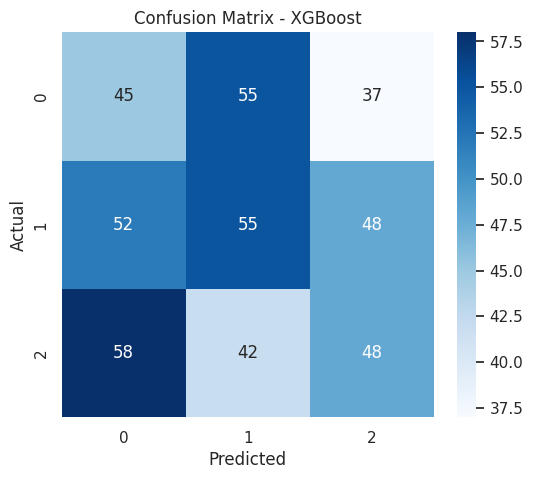

In [39]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
results = {
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

print(pd.DataFrame(results.items(), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False))

      Model  Accuracy
2  AdaBoost  0.345455
3   XGBoost  0.336364
0       SVM  0.325000
1       KNN  0.309091


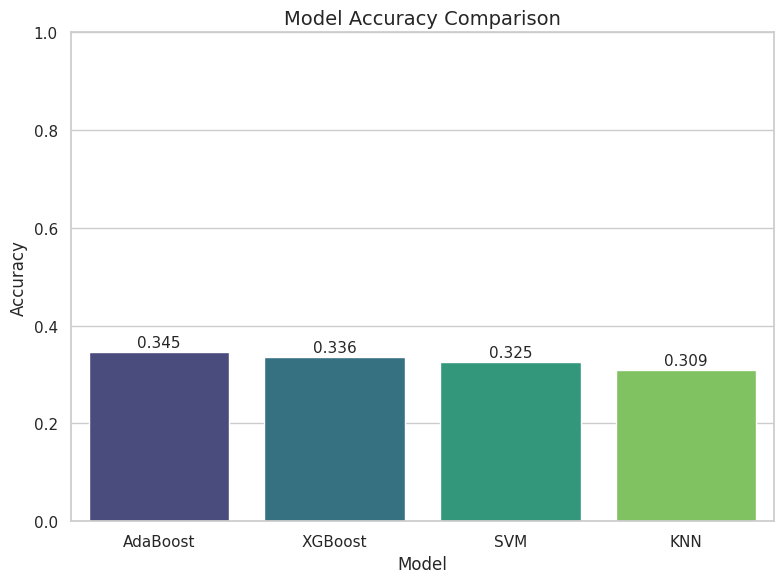

In [41]:
results_df = pd.DataFrame({
    "Model": ["AdaBoost", "XGBoost", "SVM", "KNN"],
    "Accuracy": [0.345455, 0.336364, 0.325000, 0.309091]
})

# Sort by accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(8,6))

barplot = sns.barplot(
    data=results_df,
    x="Model",
    y="Accuracy",
    palette="viridis"
)

plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)

# Add value labels
for i in range(len(results_df)):
    plt.text(
        i,
        results_df["Accuracy"].iloc[i] + 0.01,
        f"{results_df['Accuracy'].iloc[i]:.3f}",
        ha='center',
        fontsize=11
    )

plt.tight_layout()
plt.show()

## Thank you..pls upvote!!!!!